In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("TF version:", tf.__version__)

TF version: 2.18.0


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


# Data Preprocessing

In [4]:
# Reshaping data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) # reshape(batch_size, height, width, channel(color))
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) # reshape(batch_size, height, width, channel(color))
input_shape = (28, 28, 1)

# Normalize the pixel values to between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Preprocessed training labels shape: {y_train.shape}")

Preprocessed training labels shape: (60000, 10)


# Building CNN Model

In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,930 (945.04 KB)

 Trainable params: 241,738 (944.29 KB)

 Non-trainable params: 192 (768.00 B)

In [6]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
ckpt = ModelCheckpoint('best_mnist.h5', monitor='val_loss', save_best_only=True)

# Compiling and Training the model

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create & fit the generator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.08,
    height_shift_range=0.08,
    shear_range=0.08,
    zoom_range=0.08
)
datagen.fit(x_train)

# Train
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    validation_data=(x_test, y_test),
    epochs=20,                  # you can lower to 10 if time is short
    callbacks=[es, ckpt]
)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.8282 - loss: 0.5353

469/469 ━━━━━━━━━━━━━━━━━━━━ 75s 149ms/step - accuracy: 0.8284 - loss: 0.5347 - val_accuracy: 0.9781 - val_loss: 0.0751
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.9711 - loss: 0.0984

469/469 ━━━━━━━━━━━━━━━━━━━━ 90s 191ms/step - accuracy: 0.9711 - loss: 0.0983 - val_accuracy: 0.9867 - val_loss: 0.0389
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9789 - loss: 0.0702

469/469 ━━━━━━━━━━━━━━━━━━━━ 77s 164ms/step - accuracy: 0.9789 - loss: 0.0702 - val_accuracy: 0.9877 - val_loss: 0.0364
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.9821 - loss: 0.0601

469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 182ms/step - accuracy: 0.9821 - loss: 0.0601 - val_accuracy: 0.9911 - val_loss: 0.0255
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 186ms/step - accuracy: 0.9848 - loss: 0.0508 - val_accuracy: 0.9908 - val_loss: 0.0307
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 145ms/step - accuracy: 0.9860 - loss: 0.0482 - val_accuracy: 0.9923 - val_loss: 0.0261
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 76s 162ms/step - accuracy: 0.9877 - loss: 0.0419 - val_accuracy: 0.9839 - val_loss: 0.0480


In [8]:
# Export trained model for backend API
os.makedirs('backend', exist_ok=True)
model.save('backend/model.h5')
print('Saved to backend/model.h5')

Saved to backend/model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.98      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      1.00      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



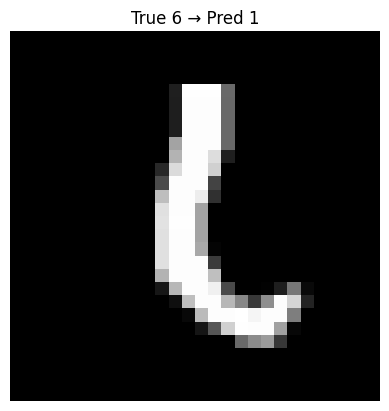

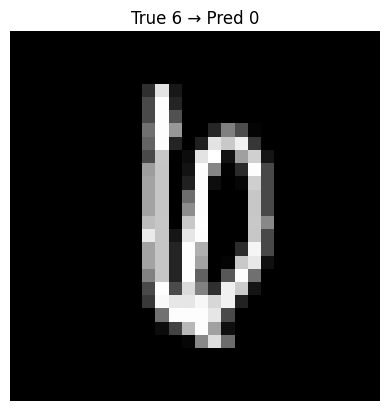

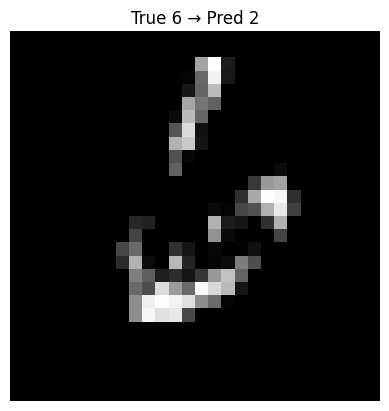

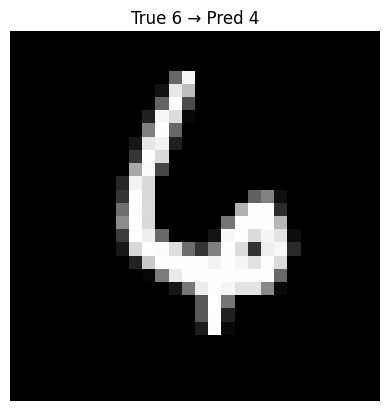

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Predictions
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred))

# Where 6 was predicted wrong
wrong6 = np.where((y_true == 6) & (y_pred != 6))[0]
for idx in wrong6[:8]:
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f'True 6 → Pred {y_pred[idx]}')
    plt.axis('off')
    plt.show()

# Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

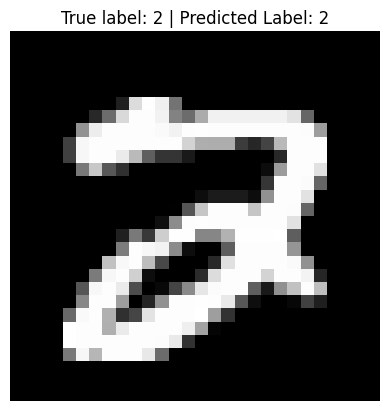

In [13]:
# Select an image from the test set
image_index = 9980
test_image = x_test[image_index]
true_label = np.argmax(y_test[image_index])

# Get the true digit
image_for_prediction = np.expand_dims(test_image, axis = 0)

# Make a predicition
prediction = model.predict(image_for_prediction)

predicted_label = np.argmax(prediction)

# Display the results
plt.imshow(test_image.squeeze(), cmap = 'gray')
plt.title(f"True label: {true_label} | Predicted Label: {predicted_label}")
plt.axis('off')
plt.show

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


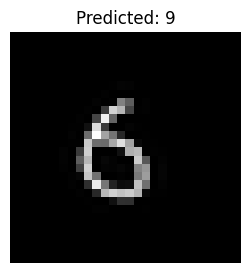

In [ ]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import os


def preprocess_digit_image(image_path: str):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Not found: {image_path}")

    # Load and convert to grayscale
    img = Image.open(image_path).convert('L')

    # Auto-invert if background appears white (MNIST expects white digit on black bg)
    np_img = np.array(img)
    if np.mean(np_img) > 127:
        img = ImageOps.invert(img)

    # Improve contrast a bit
    img = ImageOps.autocontrast(img)

    # Fit image into a 28x28 canvas, keeping aspect ratio
    img.thumbnail((28, 28), Image.LANCZOS)
    canvas = Image.new('L', (28, 28), color=0)
    paste_x = (28 - img.width) // 2
    paste_y = (28 - img.height) // 2
    canvas.paste(img, (paste_x, paste_y))

    # Normalize and reshape to model input
    arr = np.array(canvas).astype('float32') / 255.0
    arr = arr.reshape(1, 28, 28, 1)
    return canvas, arr


# 1) Set path to your digit image (PNG/JPG). Example:
# image_path = r'D:\Suyash\engineering\miniprojects\miniproject sem 5\handwritten digit recognition\my_digit.png'
image_path = r'4.png'

# 2) Preprocess and predict
processed_pil, input_tensor = preprocess_digit_image(image_path)
probs = model.predict(input_tensor)
pred = int(np.argmax(probs))

# 3) Show result
plt.figure(figsize=(3, 3))
plt.imshow(processed_pil, cmap='gray')
plt.title(f'Predicted: {pred}')
plt.axis('off')
plt.show()


In [8]:
# Quick pre-flight checks (run before training)
print("x_train:", x_train.shape, x_train.dtype, "min/max:", x_train.min(), x_train.max())
print("y_train:", y_train.shape, y_train.dtype)
print("x_test:", x_test.shape, "y_test:", y_test.shape)

assert x_train.ndim == 4 and x_train.shape[1:] == (28,28,1), "x_train must be shape (n,28,28,1)"
assert x_test.ndim == 4 and x_test.shape[1:] == (28,28,1), "x_test must be shape (n,28,28,1)"
assert y_train.ndim == 2 and y_train.shape[1] == 10, "y_train must be one-hot with 10 classes"


x_train: (60000, 28, 28, 1) float32 min/max: 0.0 1.0
y_train: (60000, 10) float64
x_test: (10000, 28, 28, 1) y_test: (10000, 10)
